# BASELINE MODEL

Using [this webpage](https://medium.com/@pallawi.ds/ai-starter-train-and-test-your-first-neural-network-classifier-in-keras-from-scratch-b6a5f3b3ebc4) to help me out

# import statements

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import numpy as np
import random

# import keras
import keras
from keras.models import Sequential
from keras import backend as K
backend_keras = keras.backend.backend()
print("keras is using", backend_keras,"as the backend")
from keras.layers.core import Dense
from keras.optimizers import SGD

keras is using tensorflow as the backend


# Load the data

In [16]:
images = np.load("redshift0750_data.npy")
labels_all = np.load("redshift0750_labels.npy")
print(images.shape)
print(labels_all.shape)

images = list(images)
labels_all = list(labels_all)

(2400, 200, 200)
(2400,)


# Preprocessing

In [17]:
# Shuffle the data
shuffled_images = []
shuffled_labels_all = []
while images:
    i = random.randrange(len(images))
    shuffled_images.append(images[i])
    del images[i]
    shuffled_labels_all.append(labels_all[i])
    del labels_all[i]
    
images = np.array(shuffled_images[:])
labels_all = np.array(shuffled_labels_all)

In [18]:
print(images.shape)
print(labels_all.shape)

(2400, 200, 200)
(2400,)


### transform the labels so that the model can learn them
Sofar the labels are floats 

In [19]:
# display the labels
l = []
for i in labels_all:
    if i not in l: l.append(i)
l.sort()
print(l,"\nThere are",len(l),"labels. So the the problem is an image classification into",len(l),"classes")

[0.07, 0.08, 0.092, 0.094, 0.096, 0.098, 0.102, 0.104, 0.106, 0.108, 0.12, 0.13] 
There are 12 labels. So the the problem is an image classification into 12 classes


In [20]:
# define the train labels in len 12 arrays
labels = []
for i in labels_all:
    arr = np.zeros(len(l))
    index = l.index(i)
    arr[index]=1
    labels.append(arr[:])
    
labels = np.array(labels)
print("train_labels shape =", labels.shape,"\n\nFirst 3 entries:")
print(labels[:3])

train_labels shape = (2400, 12) 

First 3 entries:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### normalise the images
because the values of the pixels in these images are somewhat unconventional I normalize by dividing by 40 instead of 255, this is because I checked and the max value was 66 point something.

In [21]:
# normalize images
images_n = images / 40.0 # n for normalized
print("max : ",np.max(images_n))
print("min : ",np.min(images_n))

max :  0.8809246
min :  0.0


Flatten the images for training

In [22]:
images_flatten = np.array([i.flatten("C") for i in images_n])
print("triain images flatten shape : ",images_flatten.shape)

triain images flatten shape :  (2400, 40000)


# Train Test Split

In [23]:
ratio = 0.9
cut = int(len(images_flatten)*ratio)
images_train = images_flatten[:cut]
labels_train = labels[:cut]
images_test = images_flatten[cut:]
labels_test = labels[cut:]
print("the shape of the arrays are", images_train.shape,"modify the nn appropriately")

the shape of the arrays are (2160, 40000) modify the nn appropriately


# Define Architecture
The input size is 40000 and the output is gonna have size 12. I'm gonna make it single hidden layer, see how it does.

In [24]:
model = Sequential()

model.add(Dense(800, input_shape=(40000,), activation="sigmoid"))
model.add(Dense(250, activation="sigmoid"))
model.add(Dense(12, activation="softmax"))

print("printing summary of model")
model.summary()

printing summary of model
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 800)               32000800  
_________________________________________________________________
dense_2 (Dense)              (None, 250)               200250    
_________________________________________________________________
dense_3 (Dense)              (None, 12)                3012      
Total params: 32,204,062
Trainable params: 32,204,062
Non-trainable params: 0
_________________________________________________________________


# Compile the mode
You can compile a network (model) as many times as you want. You need to compile the model if you wish to change the loss function, optimizer or matrices.

You need a compiled model to train (because training uses the loss function and the optimizer). But it’s not necessary to compile the model when testing the model on a new data.

In [26]:
# Initialize the initial learning rate and number of Epochs
INIT_LR = 0.03
EPOCHS = 50

# compile the model using SGD optimizer (see imports) and categorical cross-entropy loss
print("[INFO] Compiled the network...")
#opt = SGD(lr = INIT_LR) # stochastic gradient descent
opt = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False) # adams optimizer
model.compile(loss="categorical_crossentropy", optimizer=opt,
             metrics=["accuracy"])

[INFO] Compiled the network...


In [27]:
# split the train into a train and valid set to feed into the model
ratio = 0.8
cut = int(ratio*len(images_train))
trainX = images_train[:cut]
trainY = labels_train[:cut]
valX = images_train[cut:]
valY = labels_train[cut:]

## OR possible import an old network / pre-defined network for (re)training

# Train the network

In [28]:
print("a random guess would have probability",100./12,"% or out of 1 that would be",1./12)

a random guess would have probability 8.333333333333334 % or out of 1 that would be 0.08333333333333333


In [29]:
H = model.fit(trainX, trainY,
             validation_data=(valX,valY),
             epochs=EPOCHS, batch_size=32)

Train on 1728 samples, validate on 432 samples
Epoch 1/50
1728/1728 [==============================] - 27s 16ms/step - loss: 2.8912 - accuracy: 0.0810 - val_loss: 2.6447 - val_accuracy: 0.0602
Epoch 2/50
1728/1728 [==============================] - 38s 22ms/step - loss: 2.6044 - accuracy: 0.0868 - val_loss: 2.5361 - val_accuracy: 0.0764
Epoch 3/50
1728/1728 [==============================] - 31s 18ms/step - loss: 2.5865 - accuracy: 0.0943 - val_loss: 2.5472 - val_accuracy: 0.1042
Epoch 4/50
1728/1728 [==============================] - 27s 16ms/step - loss: 2.6004 - accuracy: 0.0775 - val_loss: 2.6412 - val_accuracy: 0.0856
Epoch 5/50
1728/1728 [==============================] - 26s 15ms/step - loss: 2.5692 - accuracy: 0.1024 - val_loss: 2.6158 - val_accuracy: 0.0949
Epoch 6/50
1728/1728 [==============================] - 25s 15ms/step - loss: 2.6063 - accuracy: 0.0764 - val_loss: 2.5632 - val_accuracy: 0.0880
Epoch 7/50
1728/1728 [==============================] - 33s 19ms/step - loss:

## Evaluate the netork

In [30]:
print("[INFO] evaluating netowrk...")
predictions = model.predict(images_test, batch_size=32)
correct, incorrect = 0,0
if len(predictions)!=len(labels_test): raise Exception
for i in range(len(predictions)):
    if list(predictions[i]).index(max(predictions[i])) == list(labels_test[i]).index(1): 
        correct +=1
    else: 
        incorrect +=1
    
print("The test data set accuracy is", 100*(correct / (correct+incorrect)))
print("THIS IS A BULLSHIT MODEL ITS EXACTLY RANDOM")

[INFO] evaluating netowrk...
The test data set accuracy is 9.166666666666666
THIS IS A BULLSHIT MODEL ITS EXACTLY RANDOM


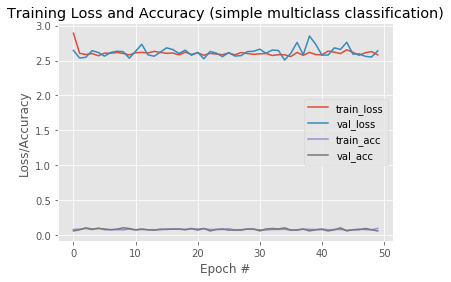

In [31]:
# plot the training loss and accuracy for each epoch
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (simple multiclass classification)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("training_performance.png")
plt.show()

### Save the weights

In [32]:
# save the model to the disk
print("[INFO] serializing network...")
model.save("keras_single_hidden_layer_40000_800_250_12_acc_____.model")

[INFO] serializing network...


# OR Import an old neural network